In [1]:
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px

In [2]:
!pip install -qq google_play_scraper

In [3]:
# Reviews_all Scrape the reviewid, username, content etc from the app page into a JSON format
sticker = reviews_all('com.aereus.whatsticker',sleep_milliseconds=0, lang='en', country='NG', sort=Sort.NEWEST)

In [4]:
# convert the json data into a dataframe
sticker_df = pd.json_normalize(sticker)

In [5]:
sticker_df.shape

(108, 11)

In [6]:
sticker_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,dec2854e-f7c2-4262-85c8-497153077677,Mahesh Gundapalli,https://play-lh.googleusercontent.com/a-/ALV-U...,హాయ్ జ్జుర్,2,0,1.9,2024-12-11 15:04:53,None,None,1.9
1,851b6c86-4cef-4c86-af86-39e549c81582,belenen,https://play-lh.googleusercontent.com/a-/ALV-U...,Requires a weekly subscription to have a decen...,1,0,1.9,2024-12-10 17:10:46,None,None,1.9
2,8be20fd8-b4e4-4273-ae76-42122b6418f2,illego mescan,https://play-lh.googleusercontent.com/a-/ALV-U...,Really good,5,0,1.9,2024-12-02 22:29:39,None,None,1.9
3,83a07f72-263a-44b5-bbff-bb20e9f8c269,Daniel Reymundo,https://play-lh.googleusercontent.com/a-/ALV-U...,"Muy buena App, demasiadas Ads.",1,0,1.9,2024-12-02 19:41:33,None,None,1.9
4,fef570af-f67a-47ef-bb0e-9c969a2de22f,Orlando Braham,https://play-lh.googleusercontent.com/a-/ALV-U...,Best,5,0,1.9,2024-11-29 16:25:53,None,None,1.9


In [7]:
from transformers import pipeline

# Save the model locally
model_name = "siebert/sentiment-roberta-large-english"
save_path = "Documents\GitHub\COK_Python"

In [8]:
# Load the pipeline and save the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)
sentiment_analysis.save_pretrained(save_path)

# Reuse the saved model
sentiment_analysis_reuse = pipeline("sentiment-analysis", model=save_path)

Device set to use cpu
Device set to use cpu


In [9]:
# Test the reused model 
# play with the parameter and see if it works

result = sentiment_analysis_reuse("This app is useless. I HAVESamsung Galaxy s8. It's not OTG compatible. Your app tested tells me congratulations. Your device is OTG compatible.")
print(result)

[{'label': 'NEGATIVE', 'score': 0.9992915391921997}]


In [10]:
#removing wildcharacter and cleaning the content column by casting to a str
sticker_df['content_new']= sticker_df['content'].astype('str')

In [11]:
sticker_df['result'] =sticker_df['content_new'].apply(lambda x: sentiment_analysis_reuse(x))

In [12]:
sticker_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result
0,dec2854e-f7c2-4262-85c8-497153077677,Mahesh Gundapalli,https://play-lh.googleusercontent.com/a-/ALV-U...,హాయ్ జ్జుర్,2,0,1.9,2024-12-11 15:04:53,None,None,1.9,హాయ్ జ్జుర్,"[{'label': 'POSITIVE', 'score': 0.987149417400..."
1,851b6c86-4cef-4c86-af86-39e549c81582,belenen,https://play-lh.googleusercontent.com/a-/ALV-U...,Requires a weekly subscription to have a decen...,1,0,1.9,2024-12-10 17:10:46,None,None,1.9,Requires a weekly subscription to have a decen...,"[{'label': 'NEGATIVE', 'score': 0.999331116676..."
2,8be20fd8-b4e4-4273-ae76-42122b6418f2,illego mescan,https://play-lh.googleusercontent.com/a-/ALV-U...,Really good,5,0,1.9,2024-12-02 22:29:39,None,None,1.9,Really good,"[{'label': 'POSITIVE', 'score': 0.998528599739..."
3,83a07f72-263a-44b5-bbff-bb20e9f8c269,Daniel Reymundo,https://play-lh.googleusercontent.com/a-/ALV-U...,"Muy buena App, demasiadas Ads.",1,0,1.9,2024-12-02 19:41:33,None,None,1.9,"Muy buena App, demasiadas Ads.","[{'label': 'POSITIVE', 'score': 0.998539328575..."
4,fef570af-f67a-47ef-bb0e-9c969a2de22f,Orlando Braham,https://play-lh.googleusercontent.com/a-/ALV-U...,Best,5,0,1.9,2024-11-29 16:25:53,None,None,1.9,Best,"[{'label': 'POSITIVE', 'score': 0.997184574604..."


In [13]:
# spliting the result into sentiment and score
sticker_df['sentiment'] = sticker_df['result'].apply(lambda x: (x[0]['label']))
sticker_df['score'] = sticker_df['result'].apply(lambda x: (x[0]['score']))

In [14]:
sticker_df[['content','score','sentiment']]

,content,score,sentiment
0,హాయ్ జ్జుర్,0.987149,POSITIVE
1,Requires a weekly subscription to have a decen...,0.999331,NEGATIVE
2,Really good,0.998529,POSITIVE
3,"Muy buena App, demasiadas Ads.",0.998539,POSITIVE
4,Best,0.997185,POSITIVE
...,...,...,...
103,Best sticker app in my opinion. So many features!,0.998749,POSITIVE
104,the Best ever,0.998570,POSITIVE
105,Not so,0.980061,NEGATIVE
106,La app perfecta en stickers!!! gracias Zyrha,0.998735,POSITIVE


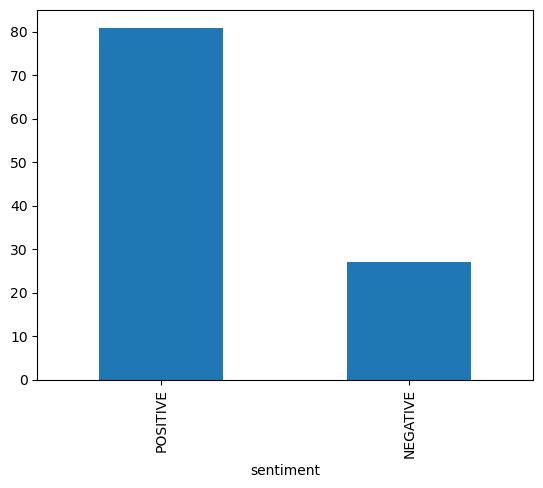

In [15]:
sticker_df['sentiment'].value_counts().plot(kind='bar');

In [16]:
#generate a series for the reviews
feature_google=sticker_df['content']
print(feature_google.size)
feature_google.head()

108


0                                          హాయ్ జ్జుర్
1    Requires a weekly subscription to have a decen...
2                                          Really good
3                       Muy buena App, demasiadas Ads.
4                                                 Best
Name: content, dtype: object

In [17]:
# Import the necessary libraries
from textblob import TextBlob


# Define a function to translate the text to English
def translate_to_en(text):
    blob = TextBlob(str(text))
    try:
        return str(blob.translate(to='en'))
    except:
        return str(text)

# Apply the translate_to_en function to the 'review' column of the DataFrame
feature_google = feature_google.apply(translate_to_en)

# Print the top 5 rows of the DataFrame with the new 'review_en' column
print(feature_google.head())

0                                          హాయ్ జ్జుర్
1    Requires a weekly subscription to have a decen...
2                                          Really good
3                       Muy buena App, demasiadas Ads.
4                                                 Best
Name: content, dtype: object


In [21]:
from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(feature_google.
                                   astype(str))

In [19]:
pip install bertopic

  Using cached bertopic-0.16.4-py3-none-any.whl.metadata (23 kB)
  Using cached sentence_transformers-3.3.1-py3-none-any.whl.metadata (10 kB)
  Using cached umap_learn-0.5.7-py3-none-any.whl.metadata (21 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
Using cached bertopic-0.16.4-py3-none-any.whl (143 kB)
   ---------------------------------------- 0.0/732.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/732.2 kB ? eta -:--:--
   - ------------------------------------- 20.5/732.2 kB 320.0 kB/s eta 0:00:03
   - ------------------------------------- 30.7/732.2 kB 259.2 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/732.2 kB 245.8 kB/s eta 0:00:03
   ---- ---------------------------------- 92.2/732.2 kB 435.7 kB/s eta 0:00:02
   ------ ------------------------------- 122.9/732.2 kB 514.3 kB/s eta 0:00:02
   ---------- --------------------------- 204.8/732.2 kB 689.9 kB/s eta 0:00:01
   --------------- ---------------------- 297.

In [22]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,12,-1_dubi_boom_la_daba,"[dubi, boom, la, daba, es, perfecta, muy, chip...","[La app perfecta en stickers!!! gracias Zyrha,..."
1,0,43,0_to_app_you_stickers,"[to, app, you, stickers, and, this, sticker, i...",[The stickers are extremely cute but it won't ...
2,1,39,1_good_very_so_love,"[good, very, so, love, cool, best, nice, its, ...","[Very good, very good, very good]"
3,2,14,2_vjiay_segs_more_lsmaij,"[vjiay, segs, more, lsmaij, language, inicia, ...","[No inicia, zyrha is amazing!, More of foreign..."


In [24]:
# the data to excel
output_file = 'playstore_reviews.xlsx'
sticker_df.to_excel(output_file, index=False)

In [25]:
dataframe=sticker_df

In [26]:

data = [tuple(row) for row in sticker_df.to_numpy()]


In [27]:
# Check if any column contains lists
for col in dataframe.columns:
    if dataframe[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains list values.")

Column 'result' contains list values.


In [28]:
# Flatten lists into comma-separated strings
for col in dataframe.columns:
    dataframe[col] = dataframe[col].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
    )

In [29]:
# Replace NaN with None
dataframe = dataframe.where(pd.notnull(dataframe), None)

In [31]:
pip install mysql.connector

     ---------------------------------------- 0.0/11.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.9 MB ? eta -:--:--
     --------------------------------------- 0.0/11.9 MB 187.9 kB/s eta 0:01:03
     --------------------------------------- 0.0/11.9 MB 187.9 kB/s eta 0:01:03
     --------------------------------------- 0.1/11.9 MB 252.2 kB/s eta 0:00:47
     --------------------------------------- 0.1/11.9 MB 327.7 kB/s eta 0:00:36
      -------------------------------------- 0.2/11.9 MB 517.2 kB/s eta 0:00:23
      -------------------------------------- 0.2/11.9 MB 567.2 kB/s eta 0:00:21
      -------------------------------------- 0.3/11.9 MB 682.7 kB/s eta 0:00:17
     - -------------------------------------- 0.5/11.9 MB 1.0 MB/s eta 0:00:12
     - -------------------------------------- 0.5/11.9 MB 1.0 MB/s eta 0:00:12
     -- ------------------------------------- 0.8/11.9 MB 1.5 MB/s

In [46]:
import mysql.connector
import pandas as pd

DB_CONFIG = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Apple123',#your password
    'database': 'playstore_reviews'
}

def create_connection():
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        print("Connected to MySQL Database!")
        return conn
    except mysql.connector.Error as err:
        if err.errno == 1049:
            print(f"Database '{DB_CONFIG['database']}' does not exist. Creating it...")
            temp_config = DB_CONFIG.copy()
            temp_config.pop('database')
            conn = mysql.connector.connect(**temp_config)
            cursor = conn.cursor()
            cursor.execute(f"CREATE DATABASE {DB_CONFIG['database']}")
            print(f"Database '{DB_CONFIG['database']}' created successfully!")
            cursor.close()
            conn.close()
            conn = mysql.connector.connect(**DB_CONFIG)
            return conn
        else:
            print(f"Error: {err}")
            return None

def infer_mysql_data_type(dtype, column_name=None):
    if column_name == "reviewId":  # Ensure `reviewId` is always VARCHAR(255)
        return "VARCHAR(255)"
    elif pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "TEXT"

def create_table_from_dataframe(cursor, df, table_name):
    columns_with_types = []
    for col in df.columns:
        dtype = df[col].dtype
        mysql_type = infer_mysql_data_type(dtype, column_name=col)
        columns_with_types.append(f"`{col}` {mysql_type}")

    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS `{table_name}` (
        {", ".join(columns_with_types)},
        PRIMARY KEY (`reviewId`)
    )
    """
    cursor.execute(create_table_query)
    print(f"Table `{table_name}` created successfully!")

def insert_data_from_dataframe(cursor, conn, df, table_name):
    columns = ", ".join([f"`{col}`" for col in df.columns])
    placeholders = ", ".join(["%s"] * len(df.columns))
    insert_query = f"""
    INSERT INTO `{table_name}` ({columns})
    VALUES ({placeholders})
    ON DUPLICATE KEY UPDATE {", ".join([f"`{col}` = VALUES(`{col}`)" for col in df.columns])}
    """
    
    for col in df.columns:
        df[col] = df[col].apply(
            lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
        )
    df = df.where(pd.notnull(df), None)

    data = [tuple(row) for row in df.to_numpy()]
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"{cursor.rowcount} rows inserted/updated successfully!")

def main():
    conn = create_connection()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    cursor = conn.cursor()

    global dataframe
    if 'dataframe' not in globals():
        print("DataFrame `dataframe` is not defined. Exiting.")
        return

    datetime_columns = ['at', 'repliedAt']
    for col in datetime_columns:
        if col in dataframe.columns:
            dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')

    table_name = "playstore_reviews"
    create_table_from_dataframe(cursor, dataframe, table_name)
    insert_data_from_dataframe(cursor, conn, dataframe, table_name)

    cursor.close()
    conn.close()
    print("MySQL connection closed.")

if __name__ == "__main__":
    dataframe = dataframe

    main()


Error: Authentication plugin 'caching_sha2_password' is not supported
Failed to connect to the database. Exiting.
